###############################
Quality flag
2.0
###############################
Variáveis disponíveis no arquivo SAR: ['VAVH', 'VPED', 'VTPK', 'time', 'longitude', 'latitude', 'wave_spec', 'partition_domain_spec', 'wavenumber_spec', 'direction_spec', 'nv', 'inten', 'snr', 'resolution_spec', 'VPED_flag', 'VTPK_flag', 'VAVH_flag', 'L2_source_product', 'L2_partition_quality_flag']
Usando arquivo preprocessado (CMEMS), shape E_sar: (60, 72)
Shape k: (60,)
Shape phi: (72,)
Conversão SAR: (60, 72) -> (60, 72)
Valores SAR originais: min=0.00e+00, max=2.32e+02
Fator de normalização SAR aplicado: 3.398953e-05
Valores convertidos: min=0.00e+00, max=2.78e-01
Energia total convertida (m2.s.rad-1): 2.42e+01
Shape freq: 60, Shape dirs: 72
DIREÇÕES CORRIGIDAS: Usando direções SAR originais (já em convenção oceanográfica)
  Direções SAR (primeiras 5): [ 0.  5. 10. 15. 20.]
  Direções utilizadas: [ 0.  5. 10. 15. 20.]


/Users/jtakeo/googleDrive/myProjects/sar-spec-partitioning/scripts/spec_partition.py:380: UserWarning: no explicit representation of timezones available for np.datetime64
  idx = abs(times - np.datetime64(date_time)).argmin()


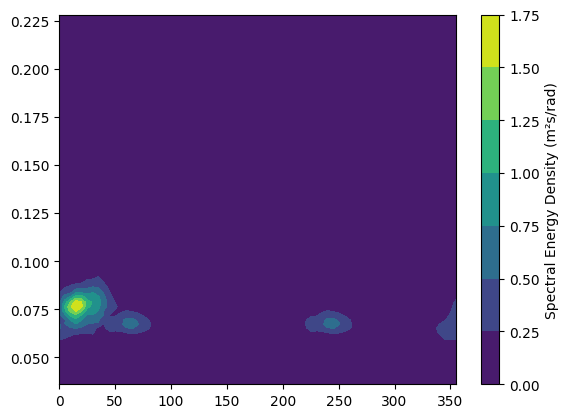

###############################
Wave parameters
total parameters hs, tp and dp:  0.7100952863693237, 14.83578109741211, 137.94073486328125
###############################
Identificando picos espectrais com threshold: 5.00e-02
Valores do espectro: min=0.00e+00, max=1.74e+00, mean=3.52e-02
Valor máximo de energia: 1.74e+00
Usando threshold relativo: 4.36e-01 (25.0% do máximo)
Threshold relativo adotado: 4.36e-01
Limitando número de picos de 4 para 3
Identificados 3 picos espectrais
Gerando máscara a partir do ICOD...
Calculando distâncias entre picos...
Calculando espalhamento de pico...
Verificando sistemas sobrepostos...
Número de máscaras: 3
[DEBUG] Soma das energias das partições: 0.031515
[DEBUG] Total esperado: 0.031515
Energia total do espectro: 0.031515
Soma das energias particionadas: 0.031515


{'mask': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 2],
        [2, 2, 2, ..., 1, 1, 2],
        [2, 2, 2, ..., 1, 1, 2]], shape=(60, 72)),
 'energy': array([0.        , 0.02236282, 0.0053123 , 0.00383958, 0.        ]),
 'Hs': array([0.        , 0.59816817, 0.29154214, 0.24785744, 0.        ]),
 'Tp': array([        nan, 13.09192085, 14.8357811 , 14.8357811 ,         nan]),
 'Dp': array([         nan,  49.8270607 , 242.5919342 ,  64.04599762,
                 nan]),
 'total_m0': np.float32(0.031514708),
 'total_Hs': np.float32(0.7100953),
 'total_Tp': np.float32(14.835781),
 'total_Dp': np.float32(137.94073),
 'nmask': 3,
 'peaks': array([[25,  4],
        [21, 14],
        [21, 50]]),
 'moments': {'total': (np.float32(0.031514708),
   np.float32(0.015249174),
   np.float32(0.0076993946)),
  'm0': array([0.        , 0.02236283, 0.0053123 , 0.00383958, 0.        ]),
  'm1': array([0.        

In [45]:
import os
import sys
import glob
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
# import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from spec_partition import load_sar_spectrum,calculate_wave_parameters,partition_spectrum
from spec_partition import identify_spectral_peaks,calculate_peak_distances,calculate_peak_spreading,merge_overlapping_systems
#file_path = '/Users/jtakeo/googleDrive/myProjects/sar-spec-partitioning/data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'
# file_path = '/Users/jtakeo/googleDrive/myProjects/finalPartSpec/surigae/sarspec/sar-data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'
# grp = "obs_params"
# ds = xr.open_dataset(file_path, group=grp)
# ds.L2_partition_quality_flag[200:234].values
# ds.VAVH_flag[215:220].values
# ds.VPED_flag[215:220].values
# ds.VTPK_flag[215:220].values
# plt.contour(ds.wave_spec[:,:,217])
# plt.show()


file_path = '/Users/jtakeo/googleDrive/myProjects/finalPartSpec/surigae/sarspec/sar-data/dataset-wav-sar-l3-spc-nrt-global-s1a_20210427T0600Z_20210526T1800Z_P20210517T0541Z_27-APR-2021-06H_lon_+158_lat_+41-rep.nc'
grp = "obs_params"
date_time="2021-04-27T00:00:00Z"
sar_scaling_factor=1.
index = 217
ds = xr.open_dataset(file_path, group=grp)
print('###############################')
print('Quality flag')
print(ds.L2_partition_quality_flag[217].values)
print('###############################')
E2d, freq, dirs, dirs_rad = None, None, None, None
E2d, freq, dirs, dirs_rad, selected_time = load_sar_spectrum(
ds, date_time, index, output_unit="m2_s_rad", scaling_factor=sar_scaling_factor
        )
plt.contourf(dirs, freq, E2d)
plt.colorbar(label='Spectral Energy Density (m²s/rad)')
plt.show()

hs, tp, dp, m0, delf, ddir, _, _ = calculate_wave_parameters(
        E2d, freq, dirs_rad
    )
print('###############################')
print('Wave parameters')
print(f'total parameters hs, tp and dp:  {hs}, {tp}, {dp}')
print('###############################')

# NF, ND = E2d.shape
# ICOD, MASK, peaks, nmask = identify_spectral_peaks(
#         E2d, NF, ND, 0.05, 5, 'sar')

# plt.contourf(MASK)
# plt.show()
# distances = calculate_peak_distances(peaks, freq, dirs_rad, nmask)
# hs, tp, dp, m0, delf, ddir, _, _ = calculate_wave_parameters(E2d, freq, dirs_rad)
# Eip = calculate_peak_spreading(E2d, MASK, freq, dirs_rad, NF, ND, nmask, m0, delf, ddir)
# MASK = merge_overlapping_systems(MASK, distances, Eip, peaks, nmask)

partition_results = partition_spectrum(
            E2d, freq, dirs_rad, 0.05, source_type='sar'
        )

partition_results